<a href="https://colab.research.google.com/github/MariamZayed/Computer_Vision_labs/blob/main/Lab3_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Section

In [ ]:
from google.colab.patches import cv2_imshow as cv_imshow

In [ ]:
from google.colab.patches import cv2_imshow as cv_imshow

In [ ]:
import numpy as np
import cv2 as cv

##Contoring

converting to grayscale image to contour with, it's a must to contour with grayscale img

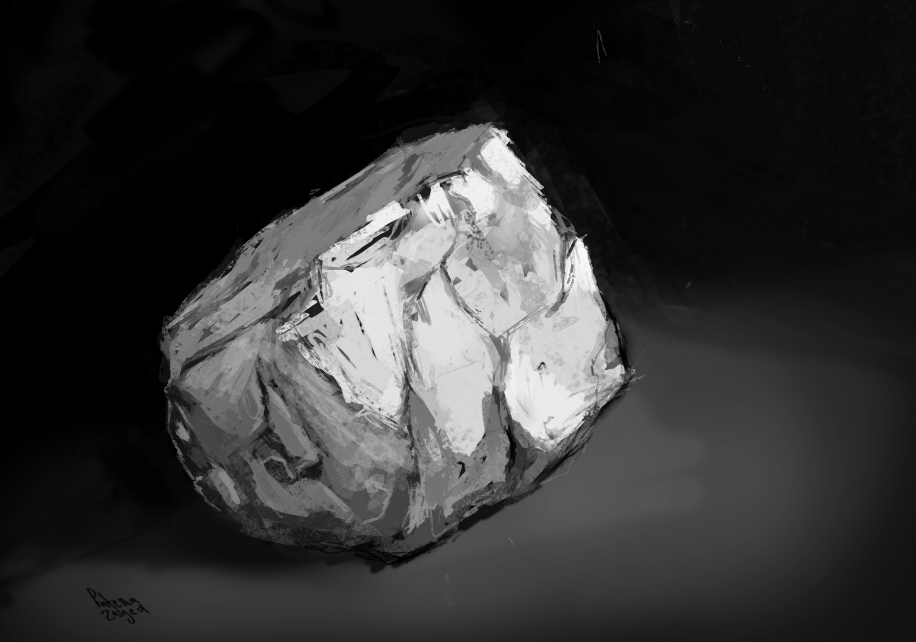

In [ ]:
original_img = cv.imread('rock.jpg')
gray_img= cv.cvtColor(original_img, cv.COLOR_BGR2GRAY)
cv_imshow(gray_img)

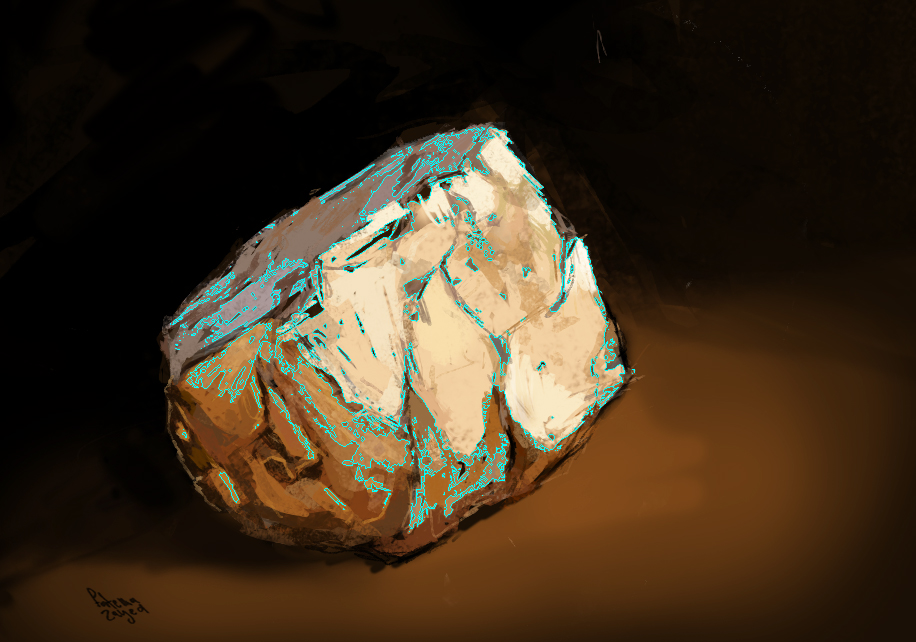

In [ ]:
thresh_value, thresh_img = cv.threshold(gray_img, 127,255 ,0)
contours, hierarchy = cv.findContours(thresh_img, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
cv.drawContours(original_img, contours, -1, (255,255,0), 1)
cv_imshow(original_img)

in first code line
* it returns 2 values, thresh_value which holds the threshold value
* the thresh_img holds the gray_img after doing the thresholdong process
* so must assign to 2 vars to avoid error.
* the fourth param in threshold fun is the type of used threshold, which is the simplest type of thresholding. we took in lab2 another kind, but to convert it to binary image (cv.THRESH_BINARY)
---
in sec line
* here we's dedecting contours in the thresholded *grayscale* image, thats why we passed it.
* hierarchy is a metadata
* sec param we wanted in tree hierarchy, keep it that way.
* third param must to use it, so by throwing cv.CHAIN_APPROX_NONE meaning we dont want further features.
---
in third line
* if we wanted to see the contours, we must use *color image* as first param. cause we wont be able to see the contouring RGB color in grayscale image
* sec pram is the contour, to draw the contoures on the colored image
* third param is the color of contouring
* fourth param is the thickness
* the output of this line is assiened to the origianl image!

How to countor an graysacle image?

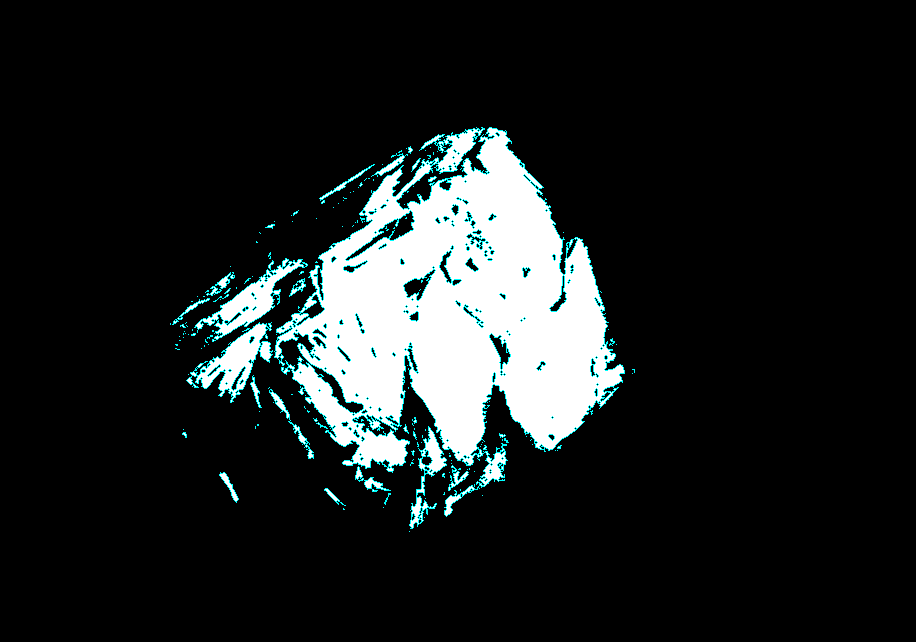

In [ ]:
img = np.zeros((200,200), dtype=np.uint8)
img[50:150 , 50:150] = 255
thresh_value, thresh_img = cv.threshold(gray_img, 127,255 ,0)
contours, hierarchy = cv.findContours(thresh_img, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

bgr_img_thresholded = cv.cvtColor(thresh_img, cv.COLOR_GRAY2BGR)
cv.drawContours(bgr_img_thresholded,contours, -1, (255,255,0), 1)
cv_imshow(bgr_img_thresholded)

## Line Dedectio/Fitting

In [ ]:
dges = cv.Canny(gray_img,50,100)
min_len = 20
max_line_gap = 5
lines = cv.HoughLinesP(edges  ,1,np.pi/180.0  ,20,  min_len,max_line_gap)

canny for edge dedectionm we need this step, and then connect our seperate edges point to lines
---
sec and third params called (single step) paramters
* sec param rho, is the step size but for pxs, for that it takes care of the resolution.
* third param theta, it's the Angle radians step, so it also effects the resolution.
* fourth param id threshold, hough depends on  votting (threshold)
*  minLineLength Minimum line length. Line segments shorter than that are rejected. يعني لو النقطه الي هوصلهم ببعض اصغر من طول معين فمش همش هوصل بيه الخط, هشوف حاجه غيرها اوصل بيها
* maxLineGap is Maximum allowed gap between points on the same line to link them. لو الجاب كبير مبين التقطه ديه والنقطه ديه فمش هاخده
* the output of the hough are points(x1,y1), (x2,y2) connected to each other

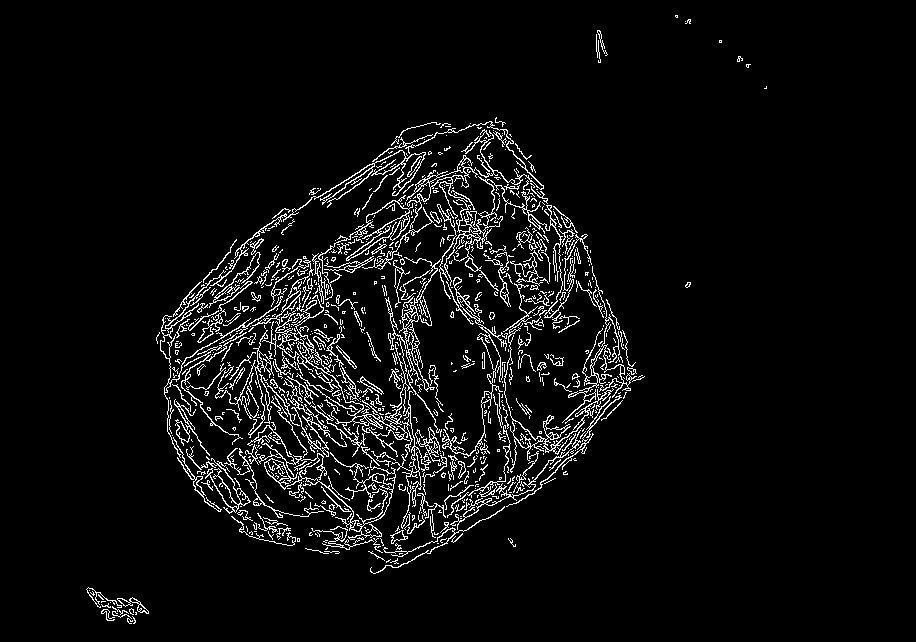

In [ ]:
for x1,y1, x2,y2 in lines[0]:
  cv.line(original_img,(x1,y1), (x2,y2), (0,255,255), 2)

cv_imshow(edges) #I dont remember why show edges? هى سمعت فيها خلاص في كود اللاين فوق؟
                  # ايه الاوت بوت لو الخليه الي فوق طلعت قلته شو الايدجيز؟

cv.line means draw a line
* the image(original_img) he wants to draw above it 
* second and third paramter(start& end points) is where he's going to draw the lines* the coloe of the dedected line
* the color of the line
* the thickness of the line


## Detecting Circles

In [ ]:
apple_img = cv.imread('apple.jpg')
gray_apple = cv.cvtColor(apple_img, cv.COLOR_BGR2GRAY)
blurr_gray_img = cv.medianBlur(gray_apple,5)

cirlce_lines = cv.HoughCircles(blurr_gray_img, cv.HOUGH_GRADIENT,1, 120, param1=100, param2=30, minRadius=0, maxRadius=0)

* since we want to edge dedction, so the sec param specify the  used مشتقه  whish is gradient.
* third param means we dont want to change resolution or blur it or whatever. the input resolution = output resolution
* fourth param is the min distance between this circle and other nighbour circle
* the fifth and sixth param is the threshold filter value to dedect the outer circle, and threshold filter for the center circle.
* minRadious=0, maxRadious=0 ha?

In [ ]:
# normlized it to make it an intger value, so to pass it as x,y-axes
normlized_circles = np.uint16(np.around(cirlce_lines))

for i in normlized_circles[0,:]: # loop form 0 to all the values in the var
  #draw this circle
    #draw the outier cicle
  cv.circle(apple_img, (i[0],i[1]),i[2], (0,255,0),1)
    #draw the center of the circle
  cv.circle(apple_img, (i[0],i[1]),2, (0,255,0),1)

cv_imshow(apple_img)

to draw a circle you need to know 3 things, the center point (x,y axies) and the radious value

 to a draw the center we pass center point(x-axis,y-axis) and a value without array **index**
* img
* center point(x-axis,y-axis)
* radius value
* color, thickness